In [5]:
import numpy as np
import random
import pandas as pd
import scipy.io as sio   ## for loading octave matlab file
import math
from scipy.special import expit #Vectorized sigmoid function
import matplotlib.pyplot as plt
import scipy.optimize #fmin_cg to train neural network
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import metrics

In [6]:
mat_contents = sio.loadmat(r"C:\Users\user\Documents\Machine learning\machine-learning-ex6\ex6\ex6data1.mat")
# training data stored in arrays X, y
X=mat_contents['X']
y=mat_contents['y']          #### taking out X and y from the matrix
print('training data X \n' ,X)
print('training data y \n' ,y)


training data X 
 [[1.9643   4.5957  ]
 [2.2753   3.8589  ]
 [2.9781   4.5651  ]
 [2.932    3.5519  ]
 [3.5772   2.856   ]
 [4.015    3.1937  ]
 [3.3814   3.4291  ]
 [3.9113   4.1761  ]
 [2.7822   4.0431  ]
 [2.5518   4.6162  ]
 [3.3698   3.9101  ]
 [3.1048   3.0709  ]
 [1.9182   4.0534  ]
 [2.2638   4.3706  ]
 [2.6555   3.5008  ]
 [3.1855   4.2888  ]
 [3.6579   3.8692  ]
 [3.9113   3.4291  ]
 [3.6002   3.1221  ]
 [3.0357   3.3165  ]
 [1.5841   3.3575  ]
 [2.0103   3.2039  ]
 [1.9527   2.7843  ]
 [2.2753   2.7127  ]
 [2.3099   2.9584  ]
 [2.8283   2.6309  ]
 [3.0473   2.2931  ]
 [2.4827   2.0373  ]
 [2.5057   2.3853  ]
 [1.8721   2.0577  ]
 [2.0103   2.3546  ]
 [1.2269   2.3239  ]
 [1.8951   2.9174  ]
 [1.561    3.0709  ]
 [1.5495   2.6923  ]
 [1.6878   2.4057  ]
 [1.4919   2.0271  ]
 [0.962    2.682   ]
 [1.1693   2.9276  ]
 [0.8122   2.9992  ]
 [0.9735   3.3881  ]
 [1.25     3.1937  ]
 [1.3191   3.5109  ]
 [2.2292   2.201   ]
 [2.4482   2.6411  ]
 [2.7938   1.9656  ]
 [2.091    1.617

In [7]:
## with loops
'''Xpos=[]
Xneg=[]
m=len(X)
for i in range(m):
    if y[i]==1:
        Xpos.append(X[i])
    else:
        Xneg.append(X[i])
Xpos=np.array(Xpos)
Xneg=np.array(Xneg)
'''
a=np.argwhere(y==1)
Xpos=X[a[:,0]]
b=np.argwhere(y==0)
Xneg=X[b[:,0]]


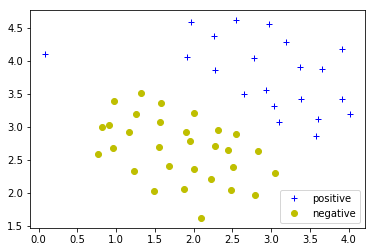

In [8]:
## plotting X and y
def plotdata(Xpos,Xneg):
    plt.plot(Xpos[:,0],Xpos[:,1],'b+',label="positive")
    plt.plot(Xneg[:,0],Xneg[:,1],'yo',label="negative")
    plt.legend(loc=4)
plotdata(Xpos,Xneg)

In [9]:
C = 1
m = len(X[:,0])
n = len(X[:,1])

In [10]:
#VISUALIZEBOUNDARYLINEAR(X, y, model) plots a non-linear decision 
#   boundary learned by the SVM and overlays the data on it

def visualizeBoundaryLinear(X,y,trained_svm):
    
    coef=trained_svm.coef_
    intercept = trained_svm.intercept_

    x1plot = np.linspace(min(X[:,0]),max(X[:,0]) ,100)
    x2plot = (-intercept - coef[0][0]*x1plot) / coef[0][1]
    
    plt.plot(x1plot,x2plot)
    

# Training Linear SVM

[[1.40718563 2.13398052]]
[-10.34889778]


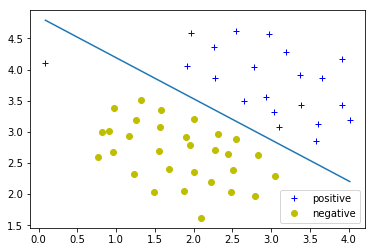

In [11]:
#linear_svm = LinearSVC(C=1)                 ## C =1  parameter (1/Lambda)
linear_svm = SVC(C=1,kernel='linear')
linear_svm.fit(X,y.ravel())
print(linear_svm.coef_)
print(linear_svm.intercept_)
plotdata(Xpos,Xneg)
visualizeBoundaryLinear(X,y,linear_svm)

[[ 4.68150544 13.08944402]]
[-53.13044783]


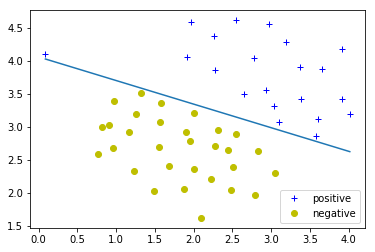

In [12]:
'''
notice the decision boundary becomes very particualar for each and every observation
see that the 1 outlier has changed the decision boundary on high value of 
'''
#linear_svm = LinearSVC(C=1)                 ## C =100  parameter (1/Lambda)
linear_svm = SVC(C=100 , kernel='linear')
linear_svm.fit(X,y.ravel())
coef=linear_svm.coef_
intercept = linear_svm.intercept_
print(linear_svm.coef_)
print(linear_svm.intercept_)
plotdata(Xpos,Xneg)
visualizeBoundaryLinear(X,y,linear_svm)

### SVM with gaussian kernels 

In [13]:
'''
RBFKERNEL returns a radial basis function kernel between x1 and x2
   sim = gaussianKernel(x1, x2) returns a gaussian kernel between x1 and x2
   and returns the value in sim
'''
def gaussianKernel(x1, x2, sigma):
    sim = 0
    sim = np.exp((np.sum(-(x1 - x2)**2))/(2*(sigma**2)))
    return sim

In [14]:
x1 = np.array([1,2,1])
x2 = np.array([0 ,4 ,-1])
sigma = 2
sim = gaussianKernel(x1, x2, sigma)
print(sim)

# x1 = [1 2 1]; x2 = [0 4 -1]; sigma = 2;
# sim = gaussianKernel(x1, x2, sigma);
# this value should be about 0.324652


0.32465246735834974


###  Training SVM with gaussian Kernel (Dataset 2)

In [15]:
mat_contents = sio.loadmat(r"C:\Users\user\Documents\Machine learning\machine-learning-ex6\ex6\ex6data2.mat")
# training data stored in arrays X, y
Xdata2=mat_contents['X']
ydata2=mat_contents['y']          #### taking out X and y from the matrix

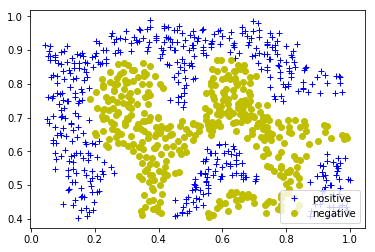

In [16]:
a=np.argwhere(ydata2==1)
Xpos=Xdata2[a[:,0]]
b=np.argwhere(ydata2==0)
Xneg=Xdata2[b[:,0]]
plotdata(Xpos,Xneg)

In [17]:
m = len(Xdata2)
#landmark_matrix = np.zeros((m,m))
#for i in range(len(Xdata2)):
 #   for j in range(len(Xdata2)):
  #      landmark_matrix[i][j] = gaussianKernel(Xdata2[i],lm[j],sigma=0.1) 
def gram_matrix(X,lm,sigma):
    gram_matrix = np.zeros((len(X),len(lm)))
    for i in range(len(X)):
        for j in range(len(lm)):
            gram_matrix[i][j] = gaussianKernel(X[i],lm[j],sigma)
    return gram_matrix
gram_mat = gram_matrix(Xdata2,Xdata2,0.1)

In [18]:
print(gram_mat.shape)

(863, 863)


In [19]:
def visualizeBoundary(Xdata2,ydata2,model,sigma):
    x1plot = np.linspace(min(Xdata2[:,0]),max(Xdata2[:,0]) ,100)
    x2plot = np.linspace(min(Xdata2[:,1]),max(Xdata2[:,1]) ,100)
    x1,x2 = np.meshgrid(x1plot,x2plot)                       #% Make classification predictions over a grid of values
    vals = np.zeros((len(x1plot),len(x2plot)))               ## make a 2d array in which we store the predictions
    for i in range(len(x1)):  
        this_x = np.concatenate((x1[:,i].reshape(len(x1),1),x2[:,i].reshape(len(x2),1)),axis=1)
        gm = gram_matrix(this_x,Xdata2,sigma)
        vals[:,i] = model.predict(gm)
    print(vals)
    mycontour = plt.contour(x1,x2,vals)

[0.40353678]
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
Wall time: 7min 23s


"\n\n## rbf and gaussian are same but they differ in param. In rbf we have gamma = 1 / (2*sigma**2))\n## this is done without training any classifier\n\nnon_linear_svm =  SVC(C=1,kernel='rbf',gamma=1/(2*(sigma**2)) )\nnon_linear_svm.fit(Xdata2,ydata2.ravel())\nplotdata(Xpos,Xneg)\nvisualizeBoundary(Xdata2,ydata2,non_linear_svm)\n\n"

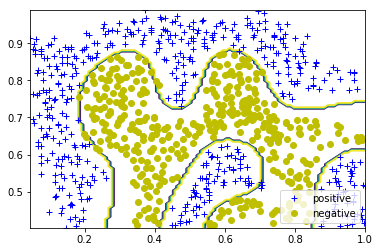

In [20]:

# SVM Parameters
C = 1
sigma = 0.1

non_linear_svm =  svm.SVC(C=1 , kernel='precomputed')
non_linear_svm.fit(gram_mat,ydata2.ravel())
print(non_linear_svm.intercept_)
%time visualizeBoundary(Xdata2,ydata2,non_linear_svm,sigma)
plotdata(Xpos,Xneg)
#visualizeBoundary(landmark_matrix,ydata2,non_linear_svm)
'''

## rbf and gaussian are same but they differ in param. In rbf we have gamma = 1 / (2*sigma**2))
## this is done without training any classifier

non_linear_svm =  SVC(C=1,kernel='rbf',gamma=1/(2*(sigma**2)) )
non_linear_svm.fit(Xdata2,ydata2.ravel())
plotdata(Xpos,Xneg)
visualizeBoundary(Xdata2,ydata2,non_linear_svm)

'''

###  Visualizing Dataset 3

In [21]:
mat_contents = sio.loadmat(r"C:\Users\user\Documents\Machine learning\machine-learning-ex6\ex6\ex6data3.mat")
# training data stored in arrays X, y
print(mat_contents)
Xdata3=mat_contents['X']
ydata3=mat_contents['y']          #### taking out X and y from the matrix\

Xvaldata3=mat_contents['Xval']
yvaldata3=mat_contents['yval']

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:29:06 2011', '__version__': '1.0', '__globals__': [], 'X': array([[-1.58986e-01,  4.23977e-01],
       [-3.47926e-01,  4.70760e-01],
       [-5.04608e-01,  3.53801e-01],
       [-5.96774e-01,  1.14035e-01],
       [-5.18433e-01, -1.72515e-01],
       [-2.92627e-01, -2.07602e-01],
       [-1.58986e-01, -4.38596e-02],
       [-5.76037e-02,  1.43275e-01],
       [-7.14286e-02,  2.71930e-01],
       [-2.97235e-01,  3.47953e-01],
       [-4.17051e-01,  2.01754e-01],
       [-4.40092e-01,  8.77193e-03],
       [-3.24885e-01, -3.21637e-02],
       [-2.46544e-01,  5.55556e-02],
       [-2.18894e-01,  2.01754e-01],
       [-3.43318e-01,  1.60819e-01],
       [-5.09217e-01,  7.89474e-02],
       [-3.84793e-01, -9.06433e-02],
       [-1.49770e-01,  1.25731e-01],
       [-1.95853e-01,  3.24561e-01],
       [-3.91705e-02, -2.19298e-01],
       [-1.08295e-01, -3.01170e-01],
       [-1.86636e-01, -3.30409e-01],
       

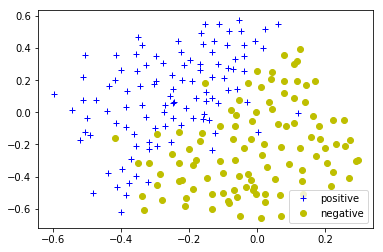

In [22]:
a=np.argwhere(ydata3==1)
Xpos=Xdata3[a[:,0]]        
b=np.argwhere(ydata3==0)
Xneg=Xdata3[b[:,0]]
plotdata(Xpos,Xneg)

In [23]:

def dataset3Params(Xdata3, ydata3, Xvaldata3, yvaldata3):
    Ctest = np.array([0.01,0.1,0.3,1,3,10,30])    ### taking some values for C from which we will find our best C
    sigmatest = Ctest                              ### taking some values for C from which we will find our best C
    final_C = 0
    final_sigma = 0
    best_accuracy = 0
    '''
    we have a total of 64 C,sigma pairs on from which we will select the best parameters
    '''
    for i in range(len(Ctest)):
        for j in range(len(sigmatest)):
            gram_mat3 = gram_matrix(Xdata3,Xdata3,sigmatest[j])   ### gram matrix for each sigma
            non_linear_svm3 =  svm.SVC(C = Ctest[i]  , kernel='precomputed')   ### making model
            non_linear_svm3.fit(gram_mat3,ydata3.ravel())                        ### fitting the model 
            gram_val =  gram_matrix(Xvaldata3,Xdata3,sigmatest[j])       ####  note that here we made gram matrix for cv set
                                                                            ##  which is used to predict y
                                                                                                                        
            y_pred = non_linear_svm3.predict(gram_val)                  ### predicy y
            temp_accuracy = metrics.accuracy_score(yvaldata3, y_pred)   ## calculating the accuracy
    
            if temp_accuracy >=best_accuracy:
                best_accuracy= temp_accuracy
                final_C = Ctest[i]
                final_sigma = sigmatest[j]
    return best_accuracy,final_C,final_sigma

    

In [24]:
best_accuracy,final_C,final_sigma = dataset3Params(Xdata3, ydata3, Xvaldata3, yvaldata3)

In [25]:
print(best_accuracy)
print(final_C)
print(final_sigma)

0.965
3.0
0.1


[0.05630356]
[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


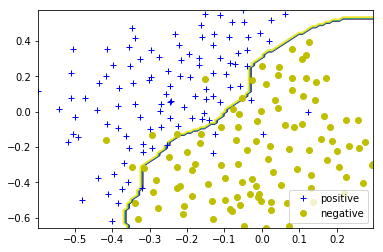

In [26]:
gram_mat3 = gram_matrix(Xdata3,Xdata3,final_sigma)              ## creating gram matrix again
non_linear_svm3 =  svm.SVC(C=final_C , kernel='precomputed')    ## making the model
non_linear_svm3.fit(gram_mat3,ydata3.ravel())                   # fitting the model
print(non_linear_svm3.intercept_)
visualizeBoundary(Xdata3,ydata3,non_linear_svm3,final_sigma)
plotdata(Xpos,Xneg)